In [1]:
import splitfolders
import os

In [10]:
path="E:\PROJECT\P1"
print(os.listdir(path))

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [11]:
splitfolders.ratio(path,seed=1337,output="Expressions",ratio=(0.7,0.2,0.1))

Copying files: 29042 files [18:08, 26.68 files/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [10]:
train_dir="D:\PROJECT\Expressions\Train"
validation_dir="D:\PROJECT\Expressions\Validation"
test_dir="D:\PROJECT\Expressions\Test"

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_gen=ImageDataGenerator(rescale=1./255,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            rotation_range=40,
                            zoom_range=0.2,
                            shear_range=0.2,
                            horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

In [98]:
train_generator=train_gen.flow_from_directory(train_dir,
                                             target_size=(75,75),
                                             batch_size=205,
                                             class_mode="categorical")
validation_generator=test_gen.flow_from_directory(validation_dir,
                                                 target_size=(75,75),
                                                 batch_size=98,
                                                 class_mode="categorical")

Found 20325 images belonging to 8 classes.
Found 5805 images belonging to 8 classes.


In [110]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50

In [117]:
conv=inception_v3.InceptionV3(weights="imagenet",
           include_top=False,
           input_shape=(75,75,3))

In [118]:
conv.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d_473 (Conv2D)         (None, 37, 37, 32)           864       ['input_11[0][0]']            
                                                                                                  
 batch_normalization_470 (B  (None, 37, 37, 32)           96        ['conv2d_473[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_470 (Activation  (None, 37, 37, 32)           0         ['batch_normalizati

                                                                                                  
 conv2d_484 (Conv2D)         (None, 7, 7, 32)             6144      ['average_pooling2d_45[0][0]']
                                                                                                  
 batch_normalization_475 (B  (None, 7, 7, 64)             192       ['conv2d_478[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_477 (B  (None, 7, 7, 64)             192       ['conv2d_480[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_480 (B  (None, 7, 7, 96)             288       ['conv2d_483[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_487 (Activation  (None, 7, 7, 96)             0         ['batch_normalization_487[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_488 (Activation  (None, 7, 7, 64)             0         ['batch_normalization_488[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 7, 7, 288)            0         ['activation_482[0][0]',      
                                                                     'activation_484[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_501 (Conv2D)         (None, 7, 7, 96)             55296     ['activation_497[0][0]']      
                                                                                                  
 batch_normalization_498 (B  (None, 7, 7, 96)             288       ['conv2d_501[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_498 (Activation  (None, 7, 7, 96)             0         ['batch_normalization_498[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_49

                                                                                                  
 conv2d_503 (Conv2D)         (None, 3, 3, 192)            147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_506 (Conv2D)         (None, 3, 3, 192)            172032    ['activation_502[0][0]']      
                                                                                                  
 conv2d_511 (Conv2D)         (None, 3, 3, 192)            172032    ['activation_507[0][0]']      
                                                                                                  
 conv2d_512 (Conv2D)         (None, 3, 3, 192)            147456    ['average_pooling2d_48[0][0]']
                                                                                                  
 batch_normalization_500 (B  (None, 3, 3, 192)            576       ['conv2d_503[0][0]']          
 atchNorma

 activation_517 (Activation  (None, 3, 3, 160)            0         ['batch_normalization_517[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_49 (Aver  (None, 3, 3, 768)            0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_513 (Conv2D)         (None, 3, 3, 192)            147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_516 (Conv2D)         (None, 3, 3, 192)            215040    ['activation_512[0][0]']      
                                                                                                  
 conv2d_52

 atchNormalization)                                                                               
                                                                                                  
 activation_522 (Activation  (None, 3, 3, 160)            0         ['batch_normalization_522[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_527 (Activation  (None, 3, 3, 160)            0         ['batch_normalization_527[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_50 (Aver  (None, 3, 3, 768)            0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_532 (B  (None, 3, 3, 192)            576       ['conv2d_535[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_537 (B  (None, 3, 3, 192)            576       ['conv2d_540[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_532 (Activation  (None, 3, 3, 192)            0         ['batch_normalization_532[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_544 (Conv2D)         (None, 1, 1, 320)            552960    ['activation_540[0][0]']      
                                                                                                  
 conv2d_548 (Conv2D)         (None, 1, 1, 192)            331776    ['activation_544[0][0]']      
                                                                                                  
 batch_normalization_541 (B  (None, 1, 1, 320)            960       ['conv2d_544[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_545 (B  (None, 1, 1, 192)            576       ['conv2d_548[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_552 (Activation  (None, 1, 1, 384)            0         ['batch_normalization_552[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_553 (Activation  (None, 1, 1, 384)            0         ['batch_normalization_553[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_554 (B  (None, 1, 1, 192)            576       ['conv2d_557[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_558 (Activation  (None, 1, 1, 384)            0         ['batch_normalization_558[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_561 (Activation  (None, 1, 1, 384)            0         ['batch_normalization_561[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_562 (Activation  (None, 1, 1, 384)            0         ['batch_normalization_562[0][0
 )                                                                  ]']                           
          

In [119]:
model=models.Sequential()
model.add(conv)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(8,activation='softmax'))

In [120]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [121]:
cb=keras.callbacks.ModelCheckpoint("Expression_prjt.keras",save_best_model=True)
es=keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

In [122]:
his=model.fit(train_generator,
         steps_per_epoch=100,
         epochs=50,
         validation_data=validation_generator,
         validation_steps=60,
          callbacks=[cb,es])

Epoch 1/50
100/100 [==============================] - 826s 8s/step - loss: 1.9794 - acc: 0.2211 - val_loss: 2.0109 - val_acc: 0.1993
Epoch 2/50
100/100 [==============================] - 463s 5s/step - loss: 1.7454 - acc: 0.3186 - val_loss: 1.8062 - val_acc: 0.3090
Epoch 3/50
100/100 [==============================] - 502s 5s/step - loss: 1.5879 - acc: 0.3900 - val_loss: 1.6345 - val_acc: 0.3885
Epoch 4/50
100/100 [==============================] - 431s 4s/step - loss: 1.4801 - acc: 0.4322 - val_loss: 1.5736 - val_acc: 0.4326
Epoch 5/50
100/100 [==============================] - 432s 4s/step - loss: 1.4050 - acc: 0.4665 - val_loss: 1.6598 - val_acc: 0.4189
Epoch 6/50
100/100 [==============================] - 432s 4s/step - loss: 1.3442 - acc: 0.4920 - val_loss: 1.6356 - val_acc: 0.4174
Epoch 7/50
100/100 [==============================] - 434s 4s/step - loss: 1.2880 - acc: 0.5147 - val_loss: 1.6600 - val_acc: 0.4317
Epoch 8/50
100/100 [==============================] - 481s 5s/step - 

[]

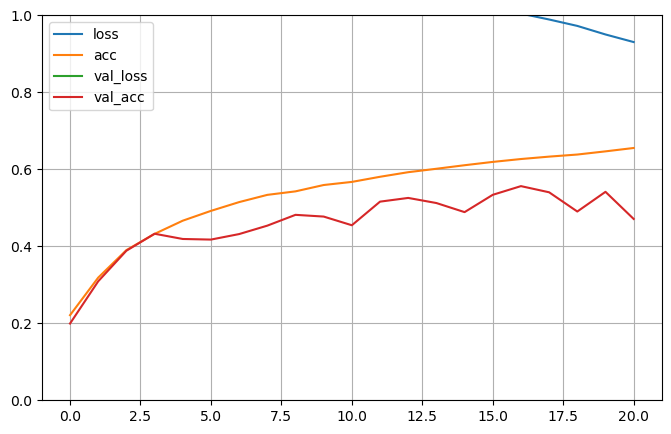

In [124]:
pd.DataFrame(his.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.plot()